### Importing the Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor 

### Importing the dataset:

In [2]:
data = pd.read_csv('Company_Data.csv')  
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Preprocessing the data:

In [3]:
label_encoder = preprocessing.LabelEncoder()
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['US']= label_encoder.fit_transform(data['US'])
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


### EDA:

(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <a list of 10 Patch objects>)

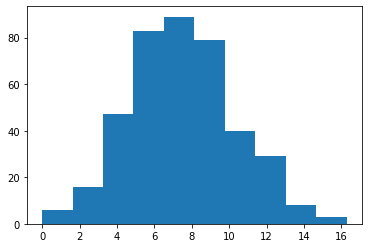

In [4]:
plt.hist(data.Sales)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a974ee8a00>,
 'caps': [<matplotlib.lines.Line2D at 0x1a974efc100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a974ee86a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a974efc7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a974efcac0>],
 'means': []}

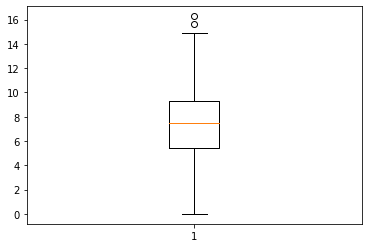

In [5]:
plt.boxplot(data.Sales)

In [6]:
data.Sales.median()

7.49

In [7]:
# Making a copy of the data before converting the target variable into 0's and 1's
data1 = data.copy()
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


#### All the values in the Sales column above the median value can be considered as High Sales otherwise they will be considered as low sales: 

In [8]:
for i in range(len(data1.Sales)):
    if data1.Sales[i] < data1.Sales.median():
        data1.Sales[i] = 0 #low sales
    else:
        data1.Sales[i] = 1 #high sales

<ipython-input-8-6633cd044cef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.Sales[i] = 1
<ipython-input-8-6633cd044cef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.Sales[i] = 0


In [9]:
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,0,42,17,1,1
1,1.0,111,48,16,260,83,1,65,10,1,1
2,1.0,113,35,10,269,80,2,59,12,1,1
3,0.0,117,100,4,466,97,2,55,14,1,1
4,0.0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,1,33,14,1,1
396,1.0,139,23,3,37,120,2,55,11,0,1
397,1.0,162,26,12,368,159,2,40,18,1,1
398,1.0,100,79,7,284,95,0,50,12,1,1


In [10]:
# Just checking if there are any errors in the above logic.
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,0.8475,0.359955,0.0,1.00,1.0,1.0,1.0
CompPrice,400.0,124.9750,15.334512,77.0,115.00,125.0,135.0,175.0
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0
Advertising,400.0,6.6350,6.650364,0.0,0.00,5.0,12.0,29.0
Population,400.0,264.8400,147.376436,10.0,139.00,272.0,398.5,509.0
Price,400.0,115.7950,23.676664,24.0,100.00,117.0,131.0,191.0
ShelveLoc,400.0,1.3075,0.833475,0.0,1.00,2.0,2.0,2.0
Age,400.0,53.3225,16.200297,25.0,39.75,54.5,66.0,80.0
Education,400.0,13.9000,2.620528,10.0,12.00,14.0,16.0,18.0
Urban,400.0,0.7050,0.456614,0.0,0.00,1.0,1.0,1.0


In [11]:
x=data1.iloc[:,1:]
y=data1['Sales']

In [12]:
data1.Sales.value_counts()

1.0    339
0.0     61
Name: Sales, dtype: int64

#### Splitting the data:

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building the C5.0 model:

In [14]:
model_c5_0 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_c5_0.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

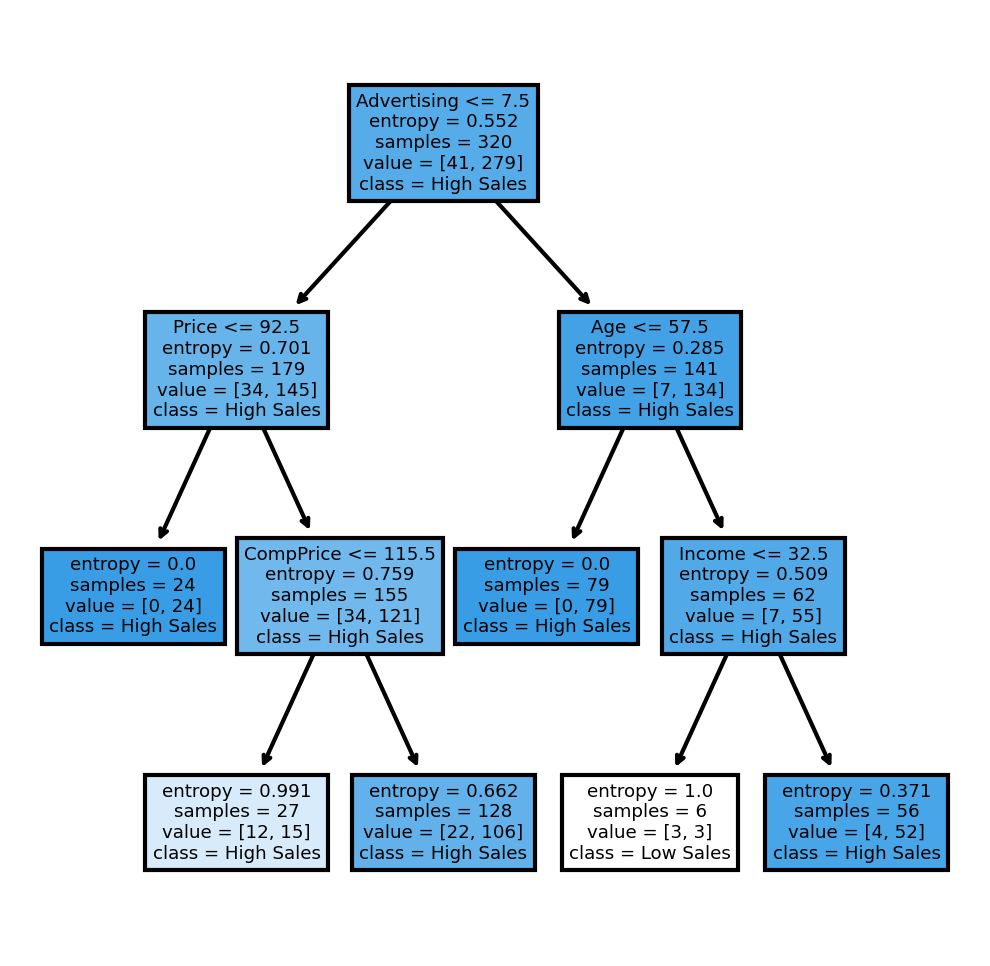

In [15]:
colnames = list(data1.columns)
fn= colnames[1:]
cn=["Low Sales", "High Sales"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_c5_0,
               feature_names =fn, 
               class_names=cn,
               filled = True);

### Checking the accuracy of the model:

In [16]:
preds = model_c5_0.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1.0    79
0.0     1
dtype: int64

In [17]:
pd.crosstab(y_test,preds)

col_0,0.0,1.0
Sales,,
0.0,0,20
1.0,1,59


In [18]:
print(f"Accuracy: {round(np.mean(preds==y_test)*100, 2)}%") 

Accuracy: 73.75%


### Best Features found using Entropy method:

In [585]:
feature_imp = pd.Series(model_c5_0.feature_importances_, index= fn).sort_values(ascending=False)
feature_imp

Advertising    0.286521
Age            0.224608
Price          0.205464
CompPrice      0.159991
Income         0.123415
US             0.000000
Urban          0.000000
Education      0.000000
ShelveLoc      0.000000
Population     0.000000
dtype: float64

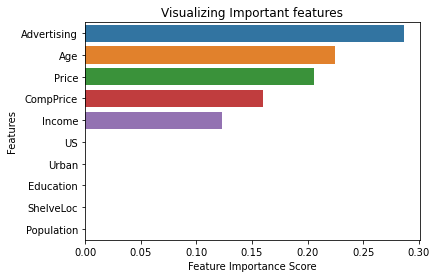

In [586]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

###### The above features are the best using entropy method for classification of high sales and low sales

### Building the CART model:

In [587]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [588]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

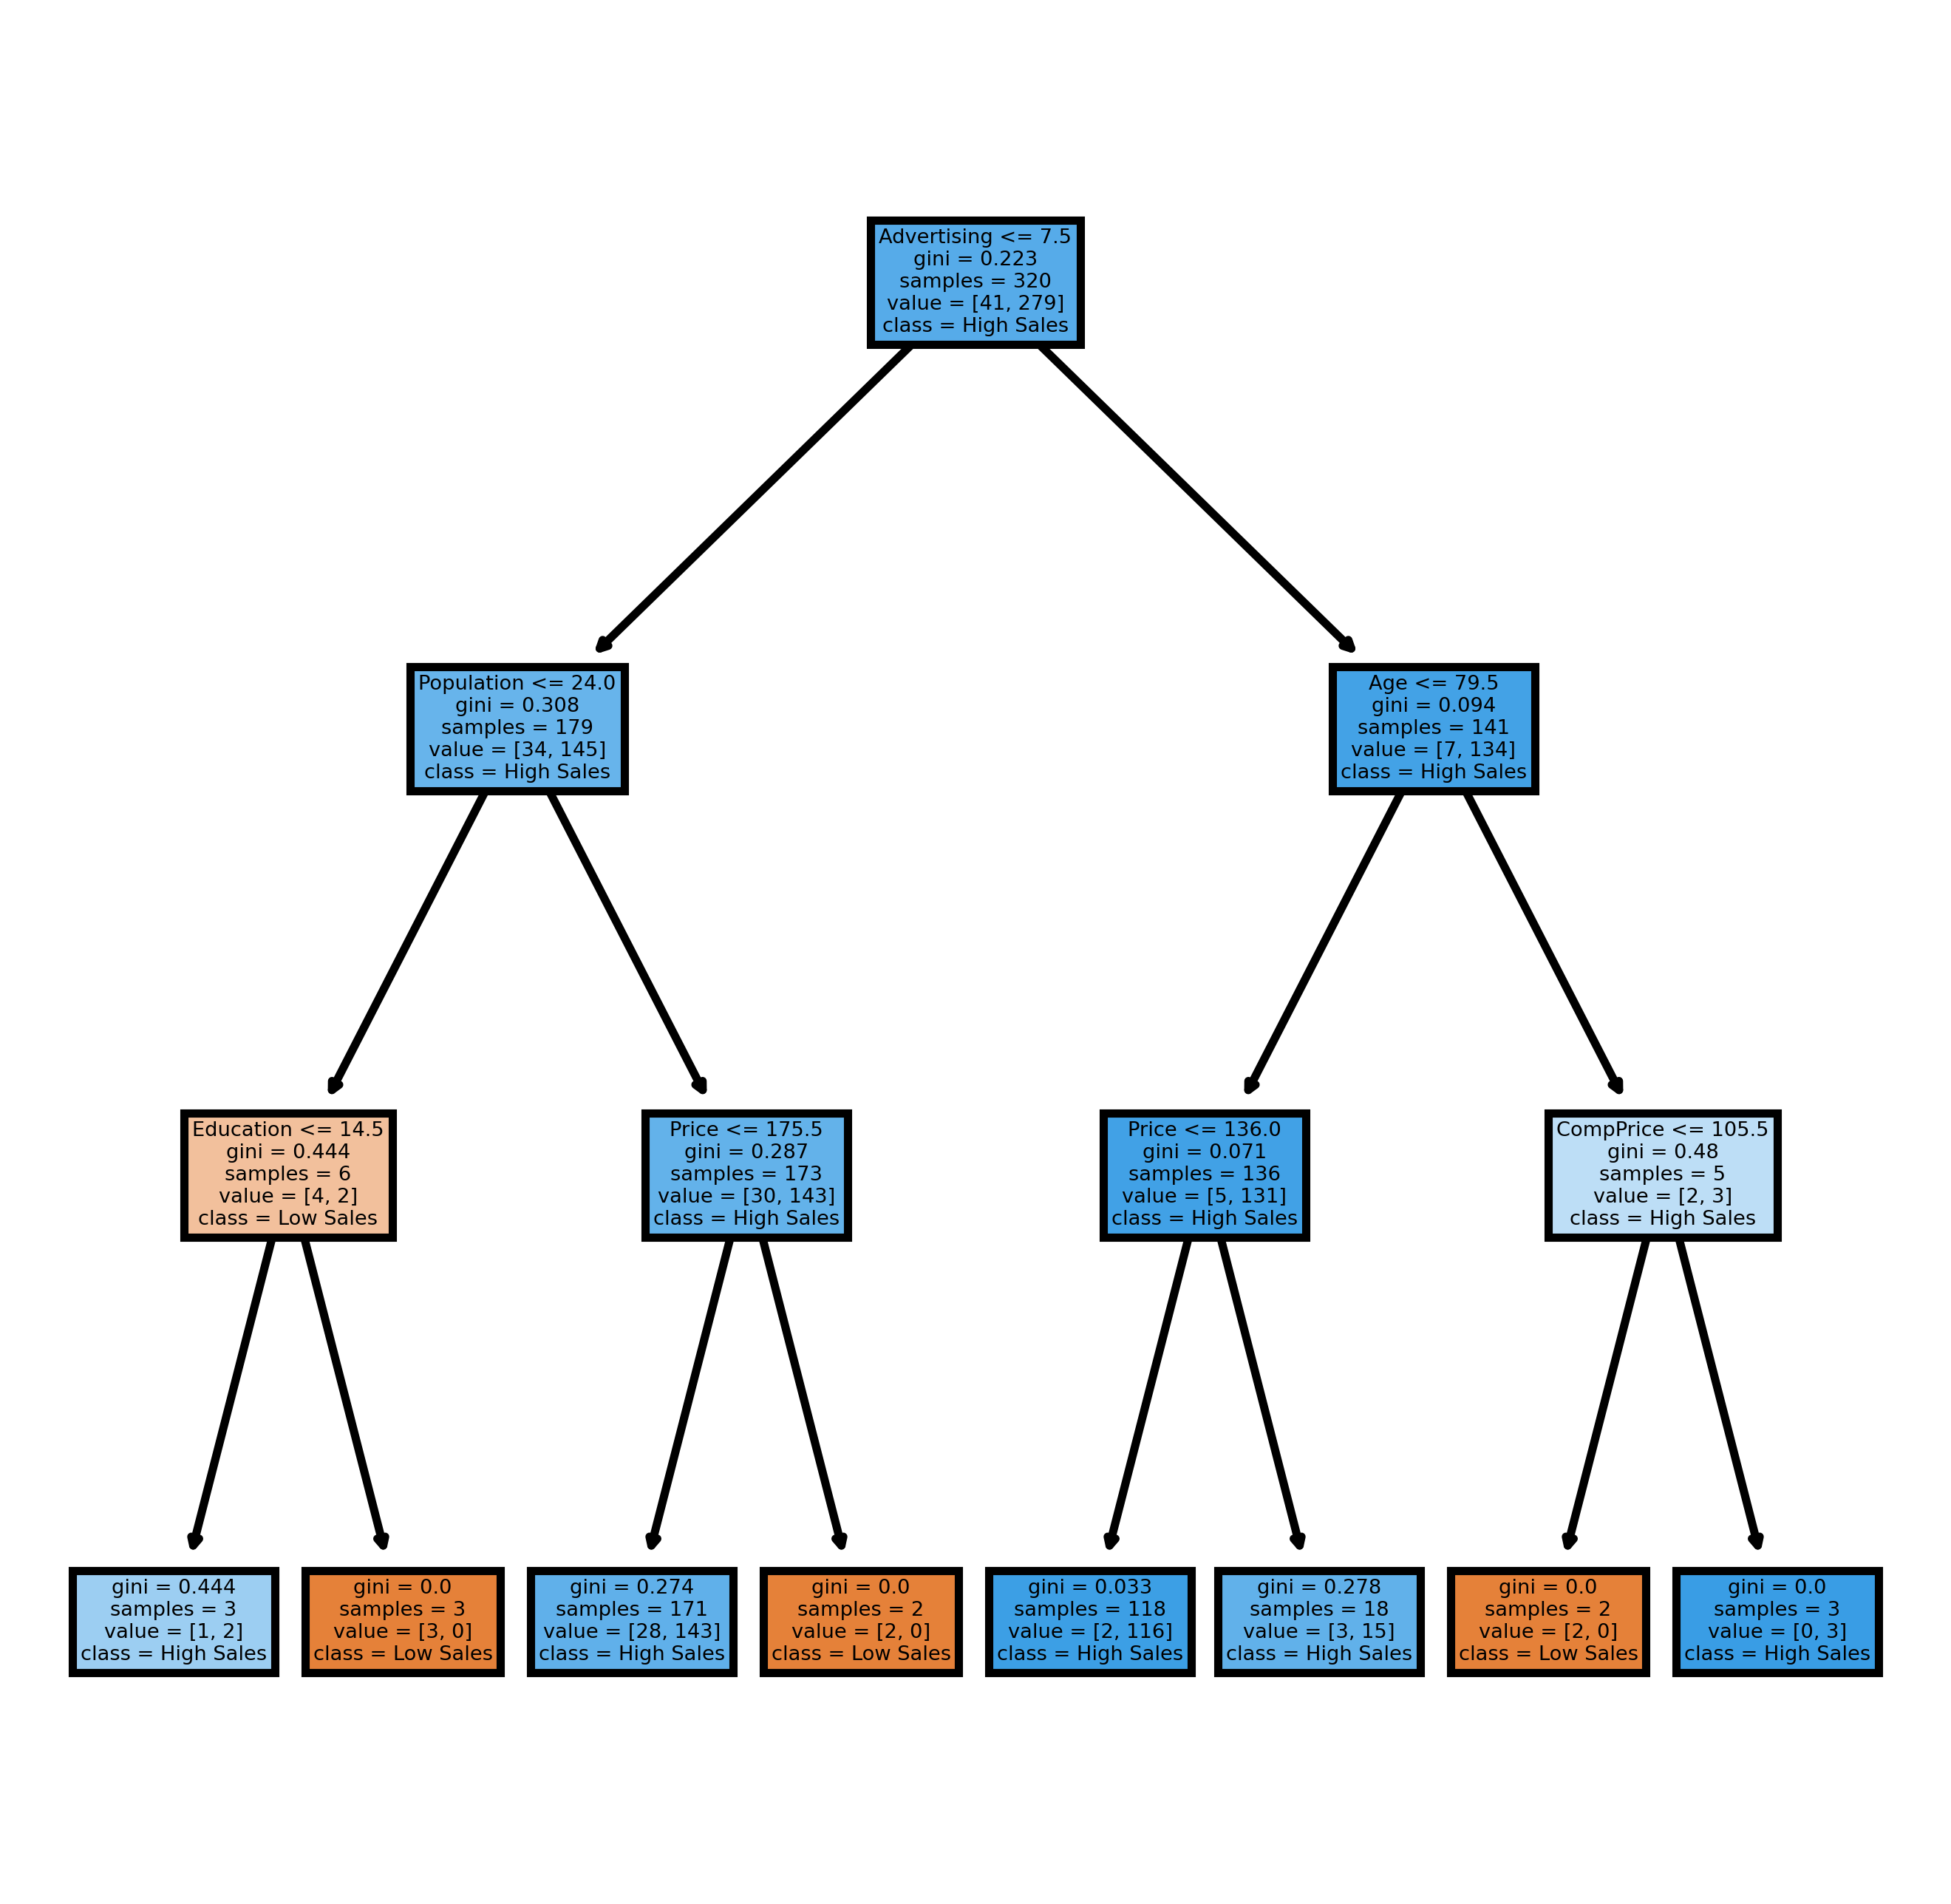

In [589]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model_gini,
               feature_names =fn, 
               class_names=cn,
               filled = True);

### Checking the accuracy of the model:

In [590]:
pred=model_gini.predict(x_test)
print(f"Accuracy: {round(np.mean(pred==y_test)*100, 2)}%") 

Accuracy: 75.0%


### Best Features found using Gini impurity criteria:

In [591]:
feature_imp_gini = pd.Series(model_gini.feature_importances_, index= fn).sort_values(ascending=False)
feature_imp_gini

Price          0.240670
Advertising    0.215657
Population     0.195985
CompPrice      0.166692
Education      0.092607
Age            0.088389
US             0.000000
Urban          0.000000
ShelveLoc      0.000000
Income         0.000000
dtype: float64

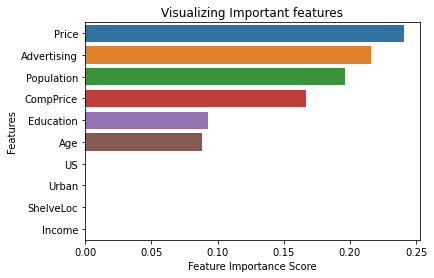

In [592]:
sns.barplot(x=feature_imp_gini, y=feature_imp_gini.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

### Preprocessing the data for Regression Decision tree:

In [640]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [641]:
X1 = data.iloc[:,1:]
y1 = data.Sales

#### Splitting the Data:

In [642]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=40) 

### Building the Regression Decision tree using MSE method:

In [643]:
model_regression_DT = DecisionTreeRegressor(criterion="mse") 
model_regression_DT.fit(X1_train, y1_train) 

DecisionTreeRegressor()

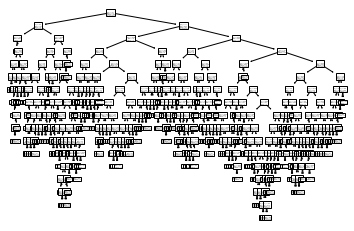

In [656]:
tree.plot_tree(model_regression_DT);

### Accuracy:

In [644]:
print(f"Accuracy: {round(model_regression_DT.score(X1_test,y1_test)*100, 2)}%")

Accuracy: 47.36%


### Best features using MSE method:

In [646]:
fn = data.iloc[:,1:]
fn = list(fn.columns)

In [647]:
feature_imp_DT = pd.Series(model_regression_DT.feature_importances_, index= fn).sort_values(ascending=False)
feature_imp_DT

ShelveLoc      0.343642
Price          0.290772
Age            0.101209
CompPrice      0.100824
Advertising    0.058898
Income         0.045395
Education      0.028050
Population     0.020086
US             0.010168
Urban          0.000957
dtype: float64

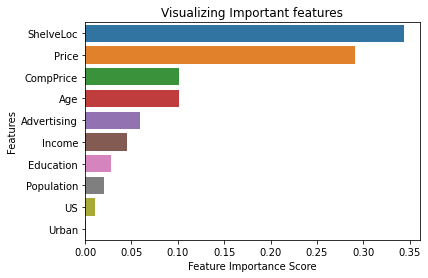

In [648]:
sns.barplot(x=feature_imp_DT, y=feature_imp_gini.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()